
## Ridership of Urban Bike Shares: the case of Citi Bike in NYC

![alt text](https://d21xlh2maitm24.cloudfront.net/nyc/01unlock2.JPG?mtime=20160428123800)

---

### OVERVIEW

Bike share programs have been implemented in cities around the world in an effort to address multiple aspects of both city functioning and quality of life for urban populations.  Traffic congestion, public health, community engagement, and air quality have all aspects of city life that could *potentially* be impacted by the introduction of a bike share program into a community.

One particularly massive bike share is New York City's [Citi Bike](https://www.citibikenyc.com/) program.  The area coverage of this program is large (extending into New Jersey across the Hudson River) and ridership initial adoption rates – as measured by the number of rides taken – were promising.  However this program has not been without controversy and there has been active discussion regarding which communities ara actually being served and which are not, who is benefitting from the availability of bikes, how they are being used for recreational vs commuter purposes, etc.

---

### **PART 1 - Background**



This bike sharing program started in 2008, when the New York City Department of Transportation (NYCDOT) was seriously concerned about pollution, traffic, accidents, and parking issues in the city. According to their findings, the majority of trips within the city are very short, **less than 3 miles**.Since bike sharing has been around since 1960 and has been successful in other cities, including New York, they determined that it would be cost effective for people while also addressing the issues listed above.In partnership with **Alta Bicycle Share**, NYCDOT launched **Citi Bike** in 2012.

The NYC Citi Bike has hundreds of stations with thousands of bikes at various locations within New York City. People purchase the subscription by paying through a debit or credit card, pick up the bike at a station, ride, and return to any station near their destination. The NYC Citi Bike Share offers passes to the public, namely daily, weekly, and yearly passes.
In case of a flat tire or damaged bike, people have to stop riding, dock it at the nearest station, and press the wrench symbol. So, other people won't use it until the damaged bike is serviced.

The Citi bike owner "lyft" has published that Citi bike has an average of 1,50000 rides per day. The total number of trips has crossed 21 million rides in the year 2020 with average rides in a week as 631,314. People with ages 30 to 45 have used bikes the most. Citi Bike has a total of 27,000 bikes and over 1,700 stations. The Annual Pass users are more.

Revenues derived from sponsorships and user fees have not been able to support operating expenses. Wear and tear on bikes is higher than anticipated. The profit per user is very small compared to the expenses. Docking station maintenance and cleanliness issuesTransporting bikes from one station to another in traffic is also difficult.The bikes, docks, and stations have to be regularly inspected. The credit, Debit cards and communications systems at stations and Mobile application is not reliable.

Citi bikes have received a positive response from the community from the start.Citi Bike faced issues and incurred losses because of operational issues and expansion costs. But the number of users has grown exponentially over the years since it was launched. Even though Citi bike is operated privately and works for profits but people liked its good cause for solving problems of high cost commute, pollution, traffic, accidents, and parking issues in the New York city.
Citi Bike also became successful through its campaigns and community events for user engagement. Citi Bike is constantly offering user engagement programs like
free Citi Bike annual memberships, virtual and in-person community events, and first-ride free campaigns.

**References:**
1. https://ride.citibikenyc.com/blog/citi-bike-equity-community-engagement

2. https://en.wikipedia.org/wiki/Citi_Bike#:~:text=Citi%20Bike%20was%20created%20as,to%20place%20the%20rental%20stations.

3. https://nacto.org/wp-content/uploads/2017/01/2016_Citi-Bike-NYC_Citi-Bike-101-Information_Flyer.pdf

4. https://gothamist.com/news/bike-boom-shows-no-signs-slowing-citi-bike-sets-new-ridership-records

5. https://citibikenyc.com/homepage

6. https://d3.harvard.edu/platform-rctom/submission/citi-bike-potholes-instead-of-profits/


### **PART 2 - Loading the data**

In [ ]:
# import packages required for this Assignment
from google.colab import drive
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Mount the drive to access the data from the Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# store the location of the file in a variable
fname = "/content/drive/MyDrive/mlpp23/data/citibike/JC-201604-citibike-tripdata.csv"

# read the csv file data into a dataframe using pandas
citi = pd.read_csv(fname)

### **PART 3 - Calculate useful metrics**

In [ ]:
# get current day using datetime library
today = datetime.date.today()
# get the current year
current_year = today.year
# make a new column as age in citi data frame, calculated as current year minus Birth Year
citi['age'] = current_year - citi['Birth Year']

In [ ]:
# add a new column called as logdur, with its values as log10(Trip Duration)
citi['logdur'] = np.log10(citi['Trip Duration'])

### **PART 4 - Visualize the data and update metrics**

Text(0, 0.5, 'Trip Duration in Seconds')

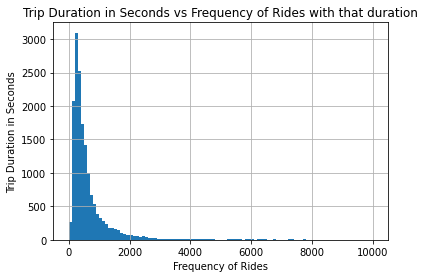

In [ ]:
# plot the histogram for Trip Duration column with bins as 100 and range from 0 to 10000 seconds
citi['Trip Duration'].hist(bins=100, range=(0, 10000))
# title for the plot
plt.title("Trip Duration in Seconds vs Frequency of Rides with that duration")
# x and y labels
plt.xlabel('Frequency of Rides')
plt.ylabel('Trip Duration in Seconds')


The Trip Duration column has more data in the mean and plot has only one peak which are the characteristics of Gaussian distribution but the plot does not have a perfect bell shape and it has more data on the right side of the plot and it is a right skewed distribution. Gaussian distribution is not skewed in any direction. So, from these observations the data in **"Trip Duration" column doesn't follow Gaussian Distribution.**

Text(0, 0.5, 'Frequency of Rides with that duration')

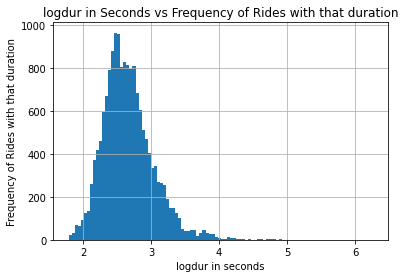

In [ ]:
# plot the histogram for logdur column with bins as 100
citi['logdur'].hist(bins=100)
# title for the plot
plt.title("logdur in Seconds vs Frequency of Rides with that duration")
# x and y labels
plt.xlabel('logdur in seconds')
plt.ylabel('Frequency of Rides with that duration')

The logdur column has more data in the mean and plot has only one peak which are the characteristics of Gaussian distribution.The plot also have a bell shape but it has more data on the right side of the plot and it is a right skewed distribution. Gaussian distribution is not skewed in any direction. So, from these observations the data in **"logdur" column doesn't follow Gaussian Distribution.**

In [ ]:
logdur_median = citi['logdur'].median()
logdur_median

2.6138418218760693

The Duration of this trip in minutes is **6.85 minutes.**

**yes, 6.85 minutes** is reasonable time for commuting.

A person can go **1.14 miles** with 10mph speed in 6.85 minutes

**10mph** is a reasonable biking speed.

In [ ]:
# short_trip is True if logarithmic duration is lesser than median logarithmic duration
citi['short_trip'] = citi['logdur'] < logdur_median

# long_trip is True if logarithmic duration is greater than median logarithmic duration
citi['long_trip'] = citi['logdur'] > logdur_median

In [ ]:
# group the citi bike data by age
citig = citi.groupby("age").sum()

In [ ]:
# create a new column called as total_trips by adding long_trip and short_trip
citig['total_trips'] = citig['long_trip'] + citig['short_trip']

In [ ]:
age_group = citig.index

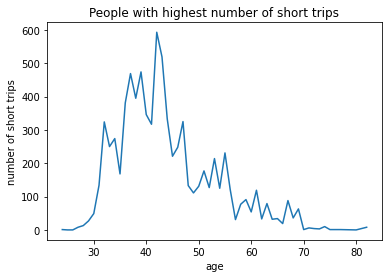

In [ ]:
# plot with age and number of short trips
plt.plot(age_group, citig['short_trip'])
# title for the plot
plt.title("People with highest number of short trips")
# x and y labels
plt.xlabel('age')
plt.ylabel('number of short trips')
plt.show()

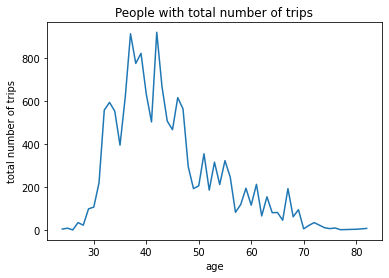

In [ ]:
# plot with age and total number of trips
plt.plot(age_group, citig['total_trips'])
# title for the plot
plt.title("People with total number of trips")
# x and y labels
plt.xlabel('age')
plt.ylabel('total number of trips')
plt.show()

**for total number of Trips:**
The majority of the people using the citi bikes for commuting belongs to the Age Group of **35 to 48**. I made the determination from the above total trips plot.

**for the short Trips:**
The majority of the people using the citi bikes for commuting short distances belongs to the Age Group of **35 to 45**. I made the determination from the short trips above plot. The Assumption we made is taking logdur median(6.85 minutes) as a condition to divide short and long trips.

Let's approximate the number of short trips as a function of age group by a parabola.  Here's the function we'll use:

In [ ]:
def short_by_age(age_groups, peak_age, peak_value):
  """
  Generate a model for the fraction of trips that are short as a
  function of age group.
  """

  model = -6e-4 * (age_groups - peak_age)**2 + peak_value

  return model

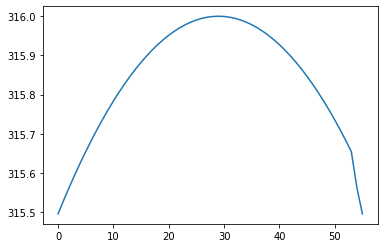

In [ ]:
""" run the short_by_age function using age_groups, peak_age, peak_value
parameters and plot the response """

""" The parabola shape came at the peak_age of 53, the peak_value is the total
number of trips of the age 53."""

plt.plot(short_by_age(age_group, 53, 316))